# Derivation of the invariant Euler Lagrange equations for SE(3) invariant Lagrangians defined over three-dimensional framed curves
<br/>

This notebook is dedicated to providing the calculations that go into deriving the invariant Euler Lagrange equations for SE(3) invariant Lagrangians defined over three-dimensional framed curves.  Unfortunately, we will not be able to use the full functionality of LieSympy as we did in the two dimensional case.  This is due to difficulties that arise in solving the normalization equations for the moving frame as well as the issue of assigning coordinates to a three dimensional framed curve and to SE(3) in general.  Therefore we will make use of LieSympy when possible, but many of our calculations will be carried out in full view within the notebook.

We begin this process by first importing the necessary modules for our work.

<br/>

In [1]:
from sympy import *
from itertools import *
import LieSympy as lp
import numpy as np
init_printing()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Initialized Symbols and Expressions
<br/>
We start by initializing the variables and expressions that will be needed for our calculations.  We will use Cardan angles in expressing coordinates for the $SO(3)$ components of $SE(3)$ and the framed curve.

#### Symbols

In [2]:
x = symbols('x')
y = Function('y')('x')
u = Function('u')('x')

a = symbols('a')
b = symbols('b')
c = symbols('c')

phi1 = Function('varphi_1')('x')
phi2 = Function('varphi_2')('x')
phi3 = Function('varphi_3')('x')

psi1 = symbols('psi_1')
psi2 = symbols('psi_2')
psi3 = symbols('psi_3')

#### Cardan Angles for $F$ and $R$.  Vectors $z$ and $v$

In [3]:
F_U = Matrix([[cos(phi1),-sin(phi1),0],[sin(phi1),cos(phi1),0],[0,0,1]])
F_Y = Matrix([[cos(phi2),0,-sin(phi2)],[0,1,0],[sin(phi2),0,cos(phi2)]])
F_X = Matrix([[1,0,0],[0,cos(phi3),-sin(phi3)],[0,sin(phi3),cos(phi3)]])

F = F_U*F_Y*F_X

R_U = Matrix([[cos(psi1),-sin(psi1),0],[sin(psi1),cos(psi1),0],[0,0,1]])
R_Y = Matrix([[cos(psi2),0,-sin(psi2)],[0,1,0],[sin(psi2),0,cos(psi2)]])
R_X = Matrix([[1,0,0],[0,cos(psi3),-sin(psi3)],[0,sin(psi3),cos(psi3)]])

R = R_X*R_Y*R_U

z = Matrix([x,y,u])
v = Matrix([a,b,c])

#### Transformation Rules for Base and Jet Coordinates

In [4]:
X = simplify((R*z+v).row(0)[0])
Y = simplify((R*z+v).row(1)[0])
U = simplify((R*z+v).row(2)[0])
F_new = R*F

Dx = diff(X,x)
Y_x = simplify(diff(Y,x)/Dx)
Y_xx = diff(Y_x,x)/Dx
U_x = simplify(diff(U,x)/Dx)
U_xx = diff(U_x,x)/Dx

F_new_x = diff(F_new,x)/Dx
F_new_xx = diff(F_new_x,x)/Dx

identity = {a:0, b:0, c:0, psi1:0, psi2:0, psi3:0}

#### Moving Frame for the Cross-section $X=Y=U=0, F_{new} = I_{3\times 3}$

In [5]:
frame = {a:-x*cos(phi1)*cos(phi2) - u*sin(phi2) - y*sin(phi1)*cos(phi2),
         b: x*sin(phi1)*cos(phi3) + x*sin(phi2)*sin(phi3)*cos(phi1) - u*sin(phi3)*cos(phi2) 
         + y*sin(phi1)*sin(phi2)*sin(phi3) - y*cos(phi1)*cos(phi3),
         c: -x*sin(phi1)*sin(phi3) + x*sin(phi2)*cos(phi1)*cos(phi3) - u*cos(phi2)*cos(phi3) 
         + y*sin(phi1)*sin(phi2)*cos(phi3) + y*sin(phi3)*cos(phi1),
         psi1:-phi1, psi2:-phi2, psi3:-phi3}

The following calculations verify that the frame does indeed work for our choice of coordinates

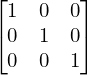

In [6]:
simplify(F_new.xreplace(frame))

In [7]:
simplify(X.xreplace(frame))

In [8]:
simplify(Y.xreplace(frame))

In [9]:
simplify(U.xreplace(frame))

# Infinitesimal Generators

For the "curve" portion of our framed curve, i.e. the $\mathcal{R}^3$ component, the infinitesimal generators are:

In [98]:
[diff(X,psi1).subs(identity),diff(Y,psi1).subs(identity),diff(U,psi1).subs(identity)]

In [99]:
[diff(X,psi2).subs(identity),diff(Y,psi2).subs(identity),diff(U,psi2).subs(identity)]

In [100]:
[diff(X,psi3).subs(identity),diff(Y,psi3).subs(identity),diff(U,psi3).subs(identity)]

For the "frame" portion of our framed curve, i.e. the $SO(3)$ component, the infinitesimal generators are:

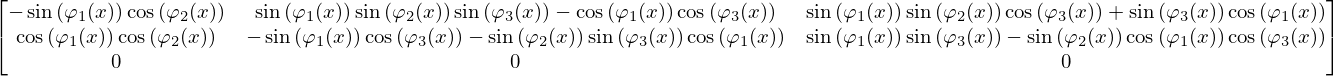

In [179]:
X1 = diff(F_new,psi1).subs(identity)
X1

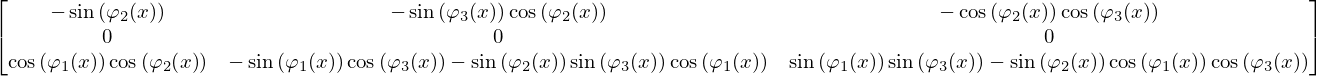

In [180]:
X2 = diff(F_new,psi2).subs(identity)
X2

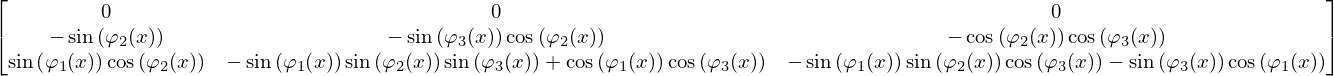

In [181]:
X3 = diff(F_new,psi3).subs(identity)
X3

We should note that we could just have well realized that these expression are found by applying $\dfrac{dR}{d\psi_j}\bigg|_{id}$ to either $z$ or $F$, i.e. we can multiply by one of the following three matrices:

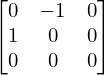

In [104]:
V_4 = diff(R,psi1).subs(identity)
V_4

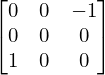

In [105]:
V_5 = diff(R,psi2).subs(identity)
V_5

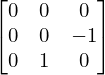

In [106]:
V_6 = diff(R,psi3).subs(identity)
V_6

# A Note About the Action of $SO(3)$ on Frames
Before moving on, we should note that the action of $SO(3)$ on the frame matrix $F$ view above can also be analyzed in the absense of an explicit parameterization of $F$ in $SO(3)$.  This is done by simply analyzing the aciton of $SO(3)$ on $\mathfrak{gl}(3)$ and imposing relation of various components.  This viewpoint is demonstrated below.

In [10]:
F11 = symbols('F11')
F12 = symbols('F12')
F13 = symbols('F13')
F21 = symbols('F21')
F22 = symbols('F22')
F23 = symbols('F23')
F31 = symbols('F31')
F32 = symbols('F32')
F33 = symbols('F33')

F = Matrix([[F11,F12,F13],[F21,F22,F23],[F31,F32,F33]])

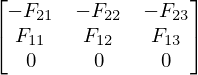

In [48]:
diff(R*F,psi1).subs(identity)

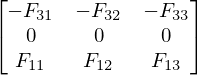

In [49]:
diff(R*F,psi2).subs(identity)

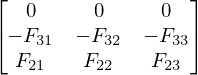

In [50]:
diff(R*F,psi3).subs(identity)

# Prolongation of Infinitesimal Generators
If we prolong the infinitesimal generators for the group action given above using the jet coordinates $(x,y,u,\varphi_1,\varphi_2,\varphi_3, y_x,u_x,\varphi_{1,x},\varphi_{2,x},\varphi_{3,x})$, we will end up with a complicated mess.  Instead, we can express the prolongations as the restriction of the prolongations induced by the ebedding $SO(3)\hookrightarrow\mathfrak{gl}(3)$.  Expressing the prolonged infinitesimal generators in coordinates will require a rather long array.  Instead of doing this, we will display only the additional components of $\texttt{pr}^1(v_i)$ that arise in prolonging $v_i$.

In [8]:
v1 = [-symbols('y'), x, 0, -F21, -F22, -F23, F11, F12, F13, 0, 0, 0]
v2 = [-symbols('u'), 0, x, -F31, -F32, -F33, 0, 0, 0, F11, F12, F13]
v3 = [0, -symbols('u'), symbols('y'), 0, 0, 0, -F31, -F32, -F33, F21, F22, F23]

A = [['x'], ['y','u','F11','F12','F13','F21','F22','F23','F31','F32','F33']]

In [9]:
lp.Prolong(A, v1, 1)[len(v1):]

In [10]:
lp.Prolong(A, v2, 1)[len(v1):]

In [11]:
lp.Prolong(A, v3, 1)[len(v1):]